# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [18]:
# import libraries and packages

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Used implictely when doing 3D plots

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

this is the code with the loop that I added 


0 = 0 * 3 + 0


/Users/bjorngudmundsson/Desktop/KU/Intro to programming/projects-2023-icehot1/inauguralproject/inauguralproject.py:63: RuntimeWarning: divide by zero encountered in reciprocal
  
/Users/bjorngudmundsson/Desktop/KU/Intro to programming/projects-2023-icehot1/inauguralproject/inauguralproject.py:63: RuntimeWarning: invalid value encountered in reciprocal
  


1 = 0 * 3 + 1
2 = 0 * 3 + 2
3 = 1 * 3 + 0
4 = 1 * 3 + 1
5 = 1 * 3 + 2
6 = 2 * 3 + 0
7 = 2 * 3 + 1
8 = 2 * 3 + 2


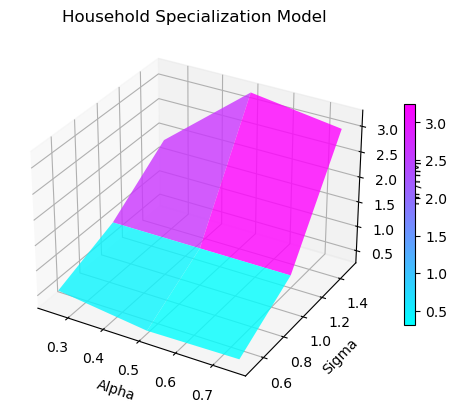

In [46]:
# Define the parameters
model = inauguralproject.HouseholdSpecializationModelClass()

alpha_values = [0.25, 0.5, 0.75]
sigma_values = [0.5, 1.0, 1.5]

HF_lis = np.zeros((3, 3))
HM_lis = np.zeros((3, 3))

# loop over the alpha and sigma values using the enumerate function
for i, alpha in enumerate(alpha_values):
    for j, sigma in enumerate(sigma_values):
        model.par.alpha = alpha
        model.par.sigma = sigma

        # solve the model
        run = model.solve_discrete()

        # store the results in arrays
        HF_lis[i, j] = run.HF
        HM_lis[i, j] = run.HM

        # print the index for each combination of alpha and sigma
        index = i * len(sigma_values) + j
        print(index, '=',i, '*', len(sigma_values), '+', j)

# Compute the ratio HF_lis/HM_lis
ratio_lis = HF_lis/HM_lis

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
alpha_values = np.transpose(alpha_values)

# Plot the surface
X, Y = np.meshgrid(alpha_values.T, sigma_values)
ax.plot_surface(X, Y, ratio_lis, cmap='cool', alpha=0.8)

# Set the labels and title
ax.set_xlabel('Alpha')
ax.set_ylabel('Sigma')
ax.set_zlabel('HF/HM')
ax.set_title('Household Specialization Model')

# Add a colorbar
m = plt.cm.ScalarMappable(cmap='cool')
m.set_array(ratio_lis)
plt.colorbar(m, shrink=0.6)

# Show the plot
plt.show()


This is the code that I had before I added the code from lucas

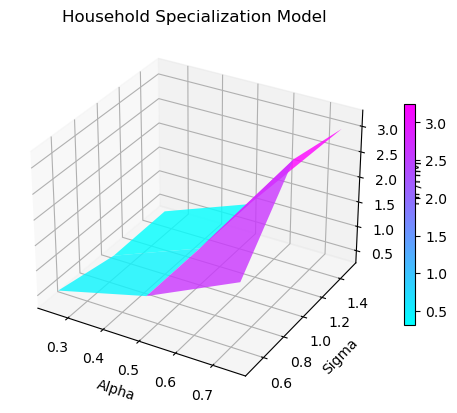

In [47]:
# Define the parameters
model = inauguralproject.HouseholdSpecializationModelClass()

alpha_values = [0.25, 0.5, 0.75]
sigma_values = [0.5, 1.0, 1.5]

HF_lis = np.zeros((3, 3))
HM_lis = np.zeros((3, 3))

# Solve the model for each combination of parameters
for i in range(3): 
    for j in range(3):
        model.par.sigma = sigma_values[i]
        model.par.alpha = alpha_values[j]

        run = model.solve_discrete()
        HF_lis[i, j] = run.HF
        HM_lis[i, j] = run.HM

# Compute the ratio HF_lis/HM_lis
ratio_lis = HF_lis/HM_lis

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
alpha_values = np.transpose(alpha_values)
# Plot the surface
X, Y = np.meshgrid(alpha_values.T, sigma_values)
ax.plot_surface(X, Y, ratio_lis, cmap='cool', alpha=0.8)

# Set the labels and title
ax.set_xlabel('Alpha')
ax.set_ylabel('Sigma')
ax.set_zlabel('HF/HM')
ax.set_title('Household Specialization Model')

# Add a colorbar
m = plt.cm.ScalarMappable(cmap='cool')
m.set_array(ratio_lis)
plt.colorbar(m, shrink=0.6)

# Show the plot
plt.show()


In [48]:
print(ratio_lis)

[[0.54545455 1.         1.83333333]
 [0.30769231 1.         3.25      ]
 [0.33333333 1.         3.        ]]


**Explain how you solve the model**

# Question 2

Explain your code and procedure

/Users/bjorngudmundsson/Desktop/KU/Intro to programming/projects-2023-icehot1/inauguralproject/inauguralproject.py:67: RuntimeWarning: invalid value encountered in reciprocal
  


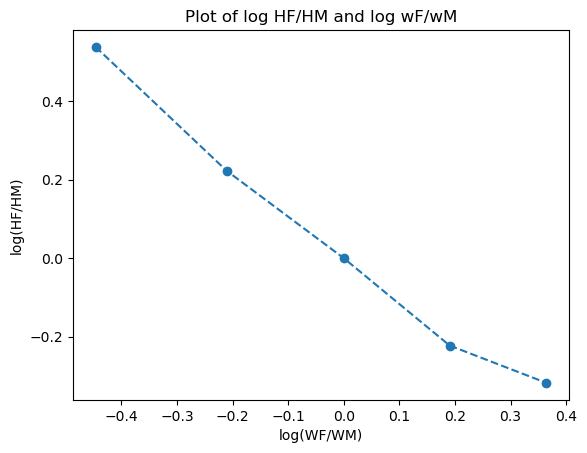

In [55]:
# Define the parameters
model = inauguralproject.HouseholdSpecializationModelClass()

alpha = 0.5
sigma = 1.0

wF_values = [0.8, 0.9, 1.0, 1.1, 1.2]

# Solve the model for each value of wF
HF_lis = []
HM_lis = []
WF_lis = []
WM_lis = []

for wF in wF_values:
    model.par.wF = wF
    model.par.wM = 1.0 / wF

    run = model.solve_discrete()
    HF_lis.append(run.HF)
    HM_lis.append(run.HM)
    WF_lis.append(wF)
    WM_lis.append(1.0 / wF)

# Convert the lists to numpy arrays
HF_lis = np.array(HF_lis)
HM_lis = np.array(HM_lis)
WF_lis = np.array(WF_lis)
WM_lis = np.array(WM_lis)

# Compute the ratio HF_lis/HM_lis
ratio_lis = HF_lis / HM_lis

# Plot log(HF/HM) against log(WF/WM)
plt.plot(np.log(WF_lis/WM_lis), np.log(ratio_lis), 'o--')

# Set the labels and title
plt.xlabel('log(WF/WM)')
plt.ylabel('log(HF/HM)')
plt.title('Plot of log HF/HM and log wF/wM')

# Show the plot
plt.show()


In [50]:
print(HF_lis)
print(HM_lis)
print(WF_lis)
print(WM_lis)

[6.  5.  4.5 4.  4. ]
[3.5 4.  4.5 5.  5.5]
[0.8 0.9 1.  1.1 1.2]
[1.25       1.11111111 1.         0.90909091 0.83333333]


# Question 3

Explain your code and procedure

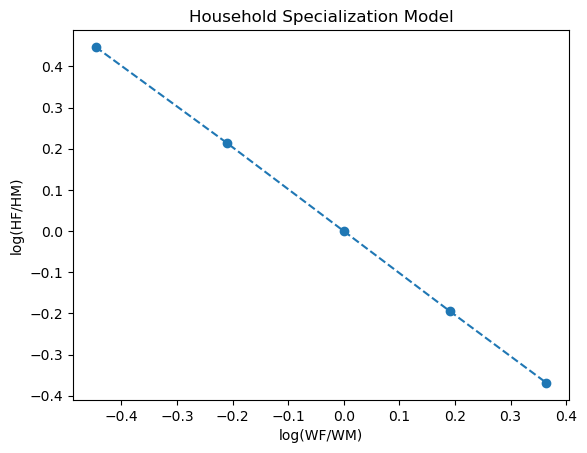

In [56]:

# Define the parameters
model = inauguralproject.HouseholdSpecializationModelClass()

alpha = 0.5
sigma = 1.0

wF_values = [0.8, 0.9, 1.0, 1.1, 1.2]

# Solve the model for each value of wF
HF_lis = []
HM_lis = []
WF_lis = []
WM_lis = []

for wF in wF_values:
    model.par.wF = wF
    model.par.wM = 1.0 / wF

    run = model.solve_continuously()
    HF_lis.append(run.HF)
    HM_lis.append(run.HM)
    WF_lis.append(wF)
    WM_lis.append(1.0 / wF)

# Convert the lists to numpy arrays
HF_lis = np.array(HF_lis)
HM_lis = np.array(HM_lis)
WF_lis = np.array(WF_lis)
WM_lis = np.array(WM_lis)

# Compute the ratio HF_lis/HM_lis
ratio_lis = HF_lis / HM_lis

# Plot log(HF/HM) against log(WF/WM)
plt.plot(np.log(WF_lis/WM_lis), np.log(ratio_lis), 'o--')

# Set the labels and title
plt.xlabel('log(WF/WM)')
plt.ylabel('log(HF/HM)')
plt.title('Household Specialization Model')

# Show the plot
plt.show()


# Question 4

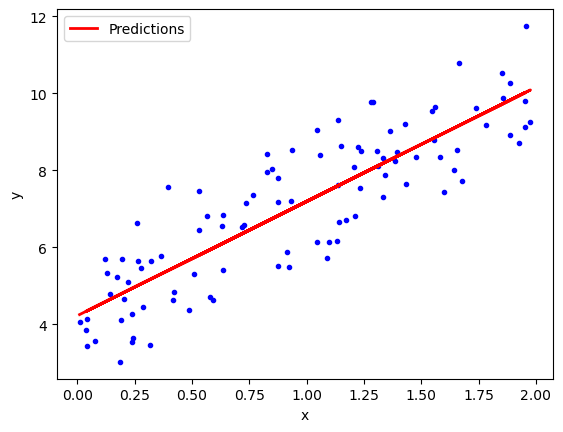

Best alpha: 0.0
Best sigma: 0.0
Coefficients: 4.222151077447226 2.9684675107010214
Mean squared error: 0.9924386487246482
Regularization term: 0.0
Total cost: 0.9924386487246482


In [57]:

# Generate some random data
model = inauguralproject.HouseholdSpecializationModelClass()
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Define the objective function
def objective_function(X, y, alpha, sigma):
    n = len(y)
    X_b = np.c_[np.ones((n, 1)), X]
    theta_hat = np.linalg.inv(X_b.T.dot(X_b) + alpha * np.identity(2)).dot(X_b.T).dot(y)
    y_hat = X_b.dot(theta_hat)
    error = y - y_hat
    mse = np.sum(error ** 2) / n
    regularization = sigma * np.sum(theta_hat[1:] ** 2)
    return mse + regularization

# Perform a grid search for alpha and sigma
alphas = np.linspace(0, 0.1, 50)
sigmas = np.linspace(0, 1, 50)
min_error = float('inf')
best_alpha = None
best_sigma = None
for alpha in alphas:
    for sigma in sigmas:
        error = objective_function(X, y, alpha, sigma)
        if error < min_error:
            min_error = error
            best_alpha = alpha
            best_sigma = sigma

# Fit the model with the best alpha an
X_b = np.c_[np.ones((100, 1)), X]
theta_hat = np.linalg.inv(X_b.T.dot(X_b) + best_alpha * np.identity(2)).dot(X_b.T).dot(y)
y_hat = X_b.dot(theta_hat)

#Plot the data and the fitted line
plt.plot(X, y, 'b.')
plt.plot(X, y_hat, 'r-', linewidth=2, label='Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

#Compute the coefficients and intercept of the fitted line
beta0_hat = theta_hat[0][0]
beta1_hat = theta_hat[1][0]

#Compute the mean squared error and the regularization term for the best alpha and sigma values
n = len(y)
error = y - y_hat
mse = np.sum(error ** 2) / n
regularization = best_sigma * np.sum(theta_hat[1:] ** 2)

#Compute the total cost for the best alpha and sigma values
total_cost = mse + regularization

#Print the results
print('Best alpha:', best_alpha)
print('Best sigma:', best_sigma)
print('Coefficients:', beta0_hat, beta1_hat)
print('Mean squared error:', mse)
print('Regularization term:', regularization)
print('Total cost:', total_cost)

# Question 5

In [53]:
#Code

ADD CONCISE CONLUSION.